# Datenbeschaffung

In [153]:
import psycopg2

# Verbindung zur PostgreSQL-Datenbank herstellen
connection = None 

try:
    connection = psycopg2.connect(
        host="130.61.234.133",      
        port="5432",                
        database="crawler_db",      
        user="crawler_user",          
        password="crawler_password" 
    )
    print("Verbindung zur Datenbank erfolgreich hergestellt.")
    
    # Cursor für SQL-Befehle
    cursor = connection.cursor()

    ## Beerbrands
    # SQL-Abfrage
    cursor.execute("SELECT * FROM beerbrands")

    # Alle Zeilen der Abfrageergebnisse abrufen
    data_beerbrands = cursor.fetchall()

    ## Beers
    cursor.execute("SELECT * FROM beers")
    data_beers = cursor.fetchall()

    ## Formats
    cursor.execute("SELECT * FROM formats")
    data_formats = cursor.fetchall()

    ## Prices
    cursor.execute("SELECT * FROM prices")
    data_prices = cursor.fetchall()

    ## Resellers
    cursor.execute("SELECT * FROM resellers")
    data_resellers = cursor.fetchall()

     ## Resellers
    cursor.execute("SELECT * FROM beer_brand_match")
    data_beer_brand_match = cursor.fetchall()

    #for zeile in daten:
        #print(zeile)
    
except Exception as error:
    print(f"Fehler beim Verbinden zur Datenbank: {error}")
    
finally:
    # Verbindung schließen, falls sie geöffnet wurde
    if connection is not None:
        cursor.close()
        connection.close()
        print("Verbindung zur Datenbank geschlossen.")



Verbindung zur Datenbank erfolgreich hergestellt.
Verbindung zur Datenbank geschlossen.


In [154]:
import pandas as pd

## Beerbrands
# Umwandlung in ein DataFrame
data_beerbrands = pd.DataFrame(data_beerbrands, columns=['brand_id', 'brand', 'id'])
#display(data_beerbrands)
print('beerbrands:', data_beerbrands.columns.tolist())

## Beers
data_beers = pd.DataFrame(data_beers, columns=['beer_id', 'name', 'alcohol_percentange'])
#display(data_beers)
print('beers:', data_beers.columns.tolist())

## Formats
data_formats = pd.DataFrame(data_formats, columns=['format_id', 'beer_id', 'quantity', 'unit'])
#display(data_formats)
print('formats:', data_formats.columns.tolist())

## Prices
data_prices = pd.DataFrame(data_prices, columns=['prices_id', 'beer_id', 'format_id', 'reseller_id', 'price', 'currency', 'date', 'url'])
#display(data_prices)
print('price:', data_prices.columns.tolist())

## Resellers
data_resellers = pd.DataFrame(data_resellers, columns=['reseller_id', 'reseller_name', 'zipcode'])
#display(data_resellers)
print('resellers:', data_resellers.columns.tolist())

## Resellers
data_beer_brand_match = pd.DataFrame(data_beer_brand_match, columns=['beer_id', 'brand_id'])
#display(data_resellers)
print('beer_brand_match:', data_beer_brand_match.columns.tolist())


beerbrands: ['brand_id', 'brand', 'id']
beers: ['beer_id', 'name', 'alcohol_percentange']
formats: ['format_id', 'beer_id', 'quantity', 'unit']
price: ['prices_id', 'beer_id', 'format_id', 'reseller_id', 'price', 'currency', 'date', 'url']
resellers: ['reseller_id', 'reseller_name', 'zipcode']
beer_brand_match: ['beer_id', 'brand_id']


In [155]:
# Merge (Left Join) durchführen
merge_beers = pd.merge(data_beers, data_prices, on='beer_id', how='left')
merge_beers = pd.merge(merge_beers, data_formats, on='format_id', how='left')
merge_beers = pd.merge(merge_beers, data_resellers, on='reseller_id', how='left')
merge_beers = merge_beers.rename(columns={'beer_id_x': 'beer_id'})
merge_beers = pd.merge(merge_beers, data_beer_brand_match, on='beer_id', how='left')
merge_beers = pd.merge(merge_beers, data_beerbrands, on='brand_id', how='left')


In [156]:
merge_beers = merge_beers.drop(columns=['beer_id_y', 'prices_id', 'format_id', 'reseller_id', 'brand_id', 'id'])
merge_beers = merge_beers.rename(columns={'beer_id_x': 'beer_id'})
merge_beers = merge_beers.reset_index(drop=True)
#display(merge_beers)
#print(merge_beers.count())


# Datenvalidierung

In [157]:
# Alle Daten mit Unbekannten Namen Löschen
#display(merge_beers[(merge_beers['name'] == 'Unknown') | (merge_beers['name'].isna())])

# Einträge filtern
filter_condition = (merge_beers['name'] == 'Unknown') | (merge_beers['name'].isna())

# Einträge löschen
merge_beers = merge_beers[~filter_condition]
#print(merge_beers.count())


In [159]:
# Alle Daten mit Unbekannten Alkoholgehalt Löschen
#filtered_df= merge_beers[(merge_beers['alcohol_percentange'] == 'Unknown') | (merge_beers['alcohol_percentange'].isna())]
#count_per_reseller = filtered_df.groupby('reseller_name').size().reset_index(name='count')
#print(count_per_reseller)

# Einträge filtern
filter_condition = (merge_beers['alcohol_percentange'] == 'Unknown') | (merge_beers['alcohol_percentange'].isna()) | (merge_beers['alcohol_percentange'] == '')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [160]:
# Alle Daten mit fehlendem Preis Löschen
#display(merge_beers[(merge_beers['price'] == 'Unknown') | (merge_beers['price'].isna()) | (merge_beers['price'] == '')])

# Einträge filtern
filter_condition = (merge_beers['price'] == 'Unknown') | (merge_beers['price'].isna()) | (merge_beers['price'] == '')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [161]:
# Alle Daten mit fehlender Mengenangabe Löschen
#display(merge_beers[(merge_beers['quantity'] == 'Unknown') | (merge_beers['quantity'].isna()) | (merge_beers['quantity'] == '')])

# Einträge filtern
filter_condition = (merge_beers['quantity'] == 'Unknown') | (merge_beers['quantity'].isna()) | (merge_beers['quantity'] == '')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [162]:
# Alle Daten mit fehlender Mengeneinheit Löschen
#display(merge_beers[(merge_beers['unit'] == 'Unknown') | (merge_beers['unit'].isna()) | (merge_beers['unit'] == '')])
#print(merge_beers.groupby('unit').count())

# Einträge filtern
filter_condition = (merge_beers['unit'] == 'Unknown') | (merge_beers['unit'].isna()) | (merge_beers['unit'] == '') | (merge_beers['unit'] == ' x')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [163]:
merge_beers['ppl'] = merge_beers['price'] / merge_beers.apply(
    lambda row: row['quantity'] / 1000 if row['unit'] == 'ml' else row['quantity'], axis=1)

In [164]:
display(merge_beers.count())

beer_id                69837
name                   69837
alcohol_percentange    69837
price                  69837
currency               69837
date                   69837
url                    69837
quantity               69837
unit                   69837
reseller_name          69837
zipcode                69726
brand                  69836
ppl                    69837
dtype: int64

In [165]:

merge_beers['ppl'] = pd.to_numeric(merge_beers['ppl'], errors='coerce')

summary = merge_beers['ppl'].describe()
#print(summary)

In [166]:
# 5. und 95. Perzentil berechnen
percentile_5 = merge_beers['ppl'].quantile(0.05)
percentile_95 = merge_beers['ppl'].quantile(0.95)

# Filter auf den DataFrame anwenden, um Werte außerhalb der Perzentilgrenzen zu entfernen
filtered_merge_beers = merge_beers[(merge_beers['ppl'] >= percentile_5) & (merge_beers['ppl'] <= percentile_95)]

summary = filtered_merge_beers['ppl'].describe()
print(summary)

count    62901.000000
mean         2.267382
std          0.508827
min          1.284000
25%          1.899000
50%          2.199495
75%          2.520202
max          3.610329
Name: ppl, dtype: float64


In [167]:
filtered_merge_beers.count()

beer_id                62901
name                   62901
alcohol_percentange    62901
price                  62901
currency               62901
date                   62901
url                    62901
quantity               62901
unit                   62901
reseller_name          62901
zipcode                62793
brand                  62900
ppl                    62901
dtype: int64

In [168]:
duplicate_columns = [
    'beer_id',             
    'name',                   
    'alcohol_percentange',    
    'price',                  
    'currency',
    'date',               
    'quantity',               
    'unit',                   
    'reseller_name',                         
    'brand',
    'zipcode'                  
]

# Entfernen von Duplikaten
filtered_merge_beers_unique = filtered_merge_beers.drop_duplicates(subset=duplicate_columns)
filtered_merge_beers_unique = filtered_merge_beers_unique.reset_index(drop=True)
#print(filtered_merge_beers_unique)

In [169]:
#Stichtag
count_per_date = filtered_merge_beers_unique.groupby('date').size().reset_index(name='count')

print(count_per_date)

         date  count
0  2024-09-17   2120
1  2024-09-18   4739
2  2024-09-19   7563
3  2024-09-20   7578
4  2024-09-21   7808
5  2024-09-22   6589
6  2024-09-24   4704
7  2024-09-25   4712
8  2024-09-27   4709


## 2024-09-21 eignet sich am besten, da meiste Datenpunkte

In [170]:
filtered_merge_beers_unique['date'] = pd.to_datetime(filtered_merge_beers_unique['date'])

filter_date = pd.to_datetime('2024-09-21')

filtered_merge_beers_unique_date = filtered_merge_beers_unique[filtered_merge_beers_unique['date'] == filter_date]

# Analyse von Preisen und Zipcodes mit Hypothesentest (ANOVA auf 5% Signifikanz)

In [171]:
zipcode_analysis = filtered_merge_beers_unique_date[['zipcode', 'reseller_name', 'ppl']]

# Ergebnis anzeigen
#print(zipcode_analysis)

In [172]:
zipcode_counts_all = zipcode_analysis.groupby('zipcode').count()
#print(zipcode_counts_all)


In [173]:
# Zipcodes mit signifikant wenig daten < 20

unwanted_zipcode = (zipcode_analysis.groupby('zipcode').count()['ppl'] < 20)
unwanted_zipcode = unwanted_zipcode[unwanted_zipcode].index.tolist()

zipcode_analysis = zipcode_analysis[~zipcode_analysis['zipcode'].isin(unwanted_zipcode)]

zipcode_counts_all = zipcode_analysis.groupby('zipcode').count()
print(zipcode_counts_all)


         reseller_name  ppl
zipcode                    
01139              420  420
09247              224  224
10243              507  507
10245              103  103
10247              103  103
10249              103  103
12277              446  446
13599              374  374
15831              248  248
22089               43   43
22529              114  114
25436              100  100
28201              343  343
38122              243  243
40235              470  470
44145              289  289
44149              354  354
45329              438  438
45356              284  284
47059              240  240
60386              419  419
60488              444  444
73730              337  337
81925               67   67
81927               67   67
81929               67   67
85649              256  256
86156              249  249
99099              297  297
online             155  155


In [174]:
# Statistiken
zipcode_summary = zipcode_analysis.groupby('zipcode').agg(
    count=('ppl', 'count'), 
    mean=('ppl', 'mean'),          # Durchschnitt
    std=('ppl', 'std'),            # Standardabweichung
    min=('ppl', 'min'),            # Minimalwert
    max=('ppl', 'max'),            # Maximalwert
    median=('ppl', 'median'),      # Median
    sum=('ppl', 'sum')             # Summe
).reset_index()

display(zipcode_summary)


,zipcode,count,mean,std,min,max,median,sum
0,01139,420,2.196130,0.516013,1.363000,3.610329,2.169192,922.374805
1,09247,224,2.284684,0.551207,1.396000,3.584507,2.227273,511.769225
2,10243,507,2.210389,0.478303,1.299000,3.610329,2.149000,1120.667112
3,10245,103,2.049493,0.364918,1.299000,3.256061,1.999000,211.097734
4,10247,103,2.049493,0.364918,1.299000,3.256061,1.999000,211.097734
5,10249,103,2.049493,0.364918,1.299000,3.256061,1.999000,211.097734
6,12277,446,2.258350,0.492563,1.339000,3.610329,2.189500,1007.224274
7,13599,374,2.223337,0.507169,1.339000,3.610329,2.169192,831.527873
8,15831,248,2.585772,0.498218,1.299000,3.559091,2.549000,641.271417
9,22089,43,2.344273,0.602031,1.300000,3.610329,2.520202,100.803723


In [175]:
from scipy import stats

# Filtere die Daten für die zipcodes heraus

zipcode_list = zipcode_analysis.groupby('zipcode')['ppl'].apply(list)

print(*zipcode_list)
# ANOVA-Test 
anova_result = stats.f_oneway(
*zipcode_list
)

# Ergebnisse 
print(f"F-Statistik: {anova_result.statistic:.4f}")
print(f"p-Wert: {anova_result.pvalue:.4f}")

# Signifikanz
if anova_result.pvalue < 0.05:
    print("Es gibt signifikante Unterschiede im Preis pro Liter zwischen den Zipcodes.")
else:
    print("Es gibt keine signifikanten Unterschiede im Preis pro Liter zwischen den Zipcodes.")



[1.593, 2.26, 2.015, 1.631, 2.212121212121212, 2.202020202020202, 2.919191919191919, 3.0353535353535355, 1.427, 2.069, 1.86, 1.899, 1.899, 1.899, 1.899, 1.899, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 2.18, 2.18, 2.18, 2.18, 2.18, 3.3066666666666666, 3.3066666666666666, 3.3066666666666666, 3.3066666666666666, 3.3066666666666666, 2.18, 2.18, 2.18, 2.18, 2.18, 2.5202020202020203, 2.5202020202020203, 2.5202020202020203, 2.5202020202020203, 2.5202020202020203, 1.899, 1.899, 1.899, 1.899, 1.899, 2.397727272727273, 2.397727272727273, 2.397727272727273, 2.397727272727273, 2.397727272727273, 1.593, 2.5782828282828283, 2.957070707070707, 2.54, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 2.4886363636363638, 1.74, 1.699, 2.1161616161616164, 1.9, 2.069, 2.18, 2.18, 2.022, 2.202020202020202, 1.88, 2.4936868686868685, 1.665, 2.196, 1.862, 2.9987373737373737, 2.48989898989899, 2.48989898989899, 2.4898989898

c:\Users\john-\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


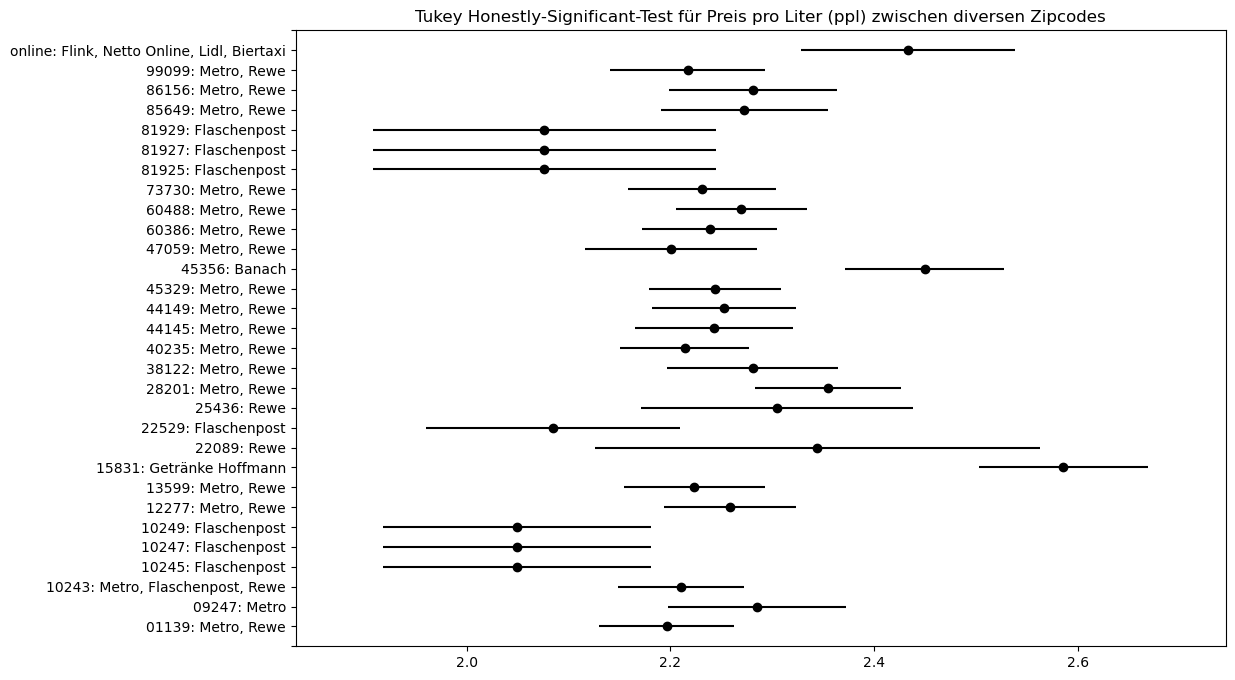

In [176]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
zipcode_reseller_analysis = zipcode_analysis
zipcode_reseller_analysis['zipcode_resellers'] = zipcode_analysis.groupby('zipcode')['reseller_name'].transform(lambda x: f"{x.name}: {', '.join(x.unique())}")

# Tukey-HSD-Test
tukey_result = pairwise_tukeyhsd(endog=zipcode_reseller_analysis['ppl'],
                                 groups=zipcode_reseller_analysis['zipcode_resellers'],
                                 alpha=0.05)

tukey_result.plot_simultaneous(figsize=(12, 8))
plt.title('Tukey Honestly-Significant-Test für Preis pro Liter (ppl) zwischen diversen Zipcodes')
plt.show()


Reseller: Flaschenpost
F-Statistik: 0.1746
p-Wert: 0.9903


,zipcode,count,mean,std,min,max,median,sum
0,10243,103,2.049493,0.364918,1.299,3.256061,1.999,211.097734
1,10245,103,2.049493,0.364918,1.299,3.256061,1.999,211.097734
2,10247,103,2.049493,0.364918,1.299,3.256061,1.999,211.097734
3,10249,103,2.049493,0.364918,1.299,3.256061,1.999,211.097734
4,22529,114,2.084786,0.352988,1.299,3.141429,1.999,237.665558
5,81925,67,2.076368,0.380440,1.299,3.025253,1.999,139.116634
6,81927,67,2.076368,0.380440,1.299,3.025253,1.999,139.116634
7,81929,67,2.076368,0.380440,1.299,3.025253,1.999,139.116634


Es gibt bei Flaschenpost keine signifikanten Unterschiede im Preis pro Liter zwischen den Zipcodes.
Reseller: Rewe
F-Statistik: 1.7290
p-Wert: 0.0286


,zipcode,count,mean,std,min,max,median,sum
0,01139,210,2.193107,0.524373,1.380,3.610329,2.099000,460.552386
1,10243,166,2.261158,0.502623,1.380,3.610329,2.180000,375.352177
2,12277,212,2.273863,0.508242,1.380,3.610329,2.189500,482.058957
3,13599,47,2.226773,0.598910,1.380,3.610329,2.116162,104.658329
4,22089,43,2.344273,0.602031,1.300,3.610329,2.520202,100.803723
5,25436,100,2.304432,0.534115,1.300,3.610329,2.520202,230.443156
6,28201,122,2.311271,0.544930,1.300,3.610329,2.520202,281.975031
7,38122,58,2.235326,0.487048,1.300,3.610329,2.368687,129.648925
8,40235,211,2.235689,0.464004,1.349,3.610329,2.180000,471.730322
9,44145,87,2.221900,0.576522,1.349,3.610329,2.116162,193.305304


Es gibt bei Rewe signifikante Unterschiede im Preis pro Liter zwischen den Zipcodes.


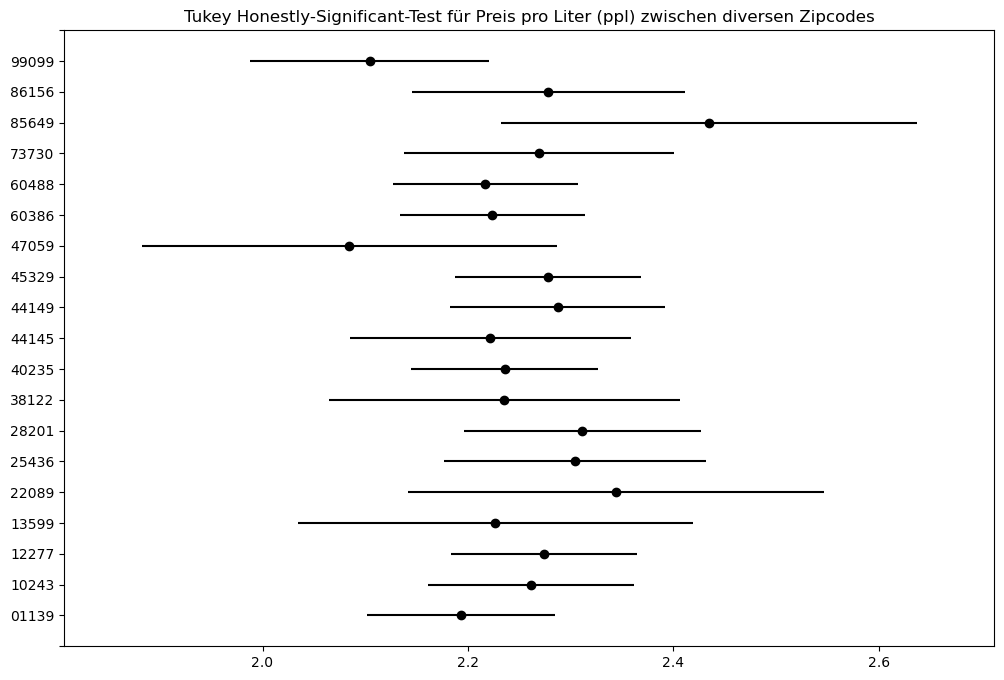

Reseller: Metro
F-Statistik: 2.0107
p-Wert: 0.0082


,zipcode,count,mean,std,min,max,median,sum
0,01139,210,2.199154,0.508751,1.363000,3.584507,2.180000,461.822419
1,09247,224,2.284684,0.551207,1.396000,3.584507,2.227273,511.769225
2,10243,238,2.244610,0.490928,1.339000,3.584507,2.180000,534.217200
3,12277,234,2.244296,0.478573,1.339000,3.584507,2.189747,525.165316
4,13599,327,2.222843,0.493649,1.339000,3.584507,2.169192,726.869544
5,28201,221,2.378151,0.505649,1.300000,3.584507,2.484848,525.571321
6,38122,185,2.295185,0.482476,1.339000,3.584507,2.260667,424.609203
7,40235,259,2.196132,0.479196,1.289000,3.584507,2.171717,568.798301
8,44145,202,2.251662,0.519356,1.289000,3.584507,2.180000,454.835640
9,44149,203,2.227053,0.489969,1.289000,3.595960,2.180000,452.091768


Es gibt bei Metro signifikante Unterschiede im Preis pro Liter zwischen den Zipcodes.


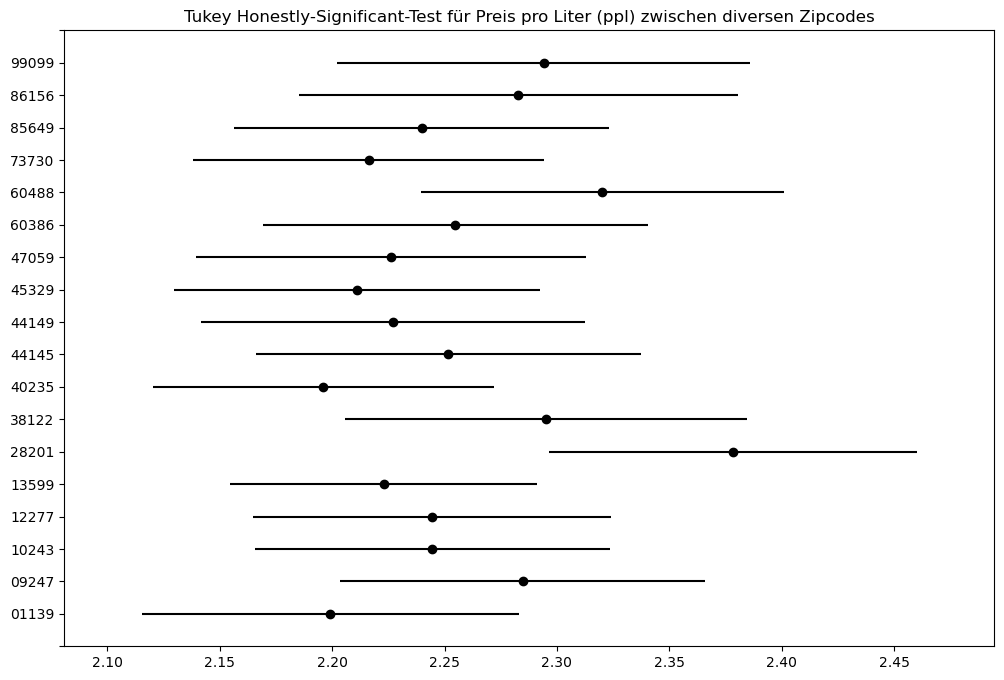

In [178]:
reseller_liste = ["Flaschenpost", "Rewe", "Metro"]
for reseller_name in reseller_liste:
    reseller_data = zipcode_analysis[zipcode_analysis['reseller_name'] == reseller_name]
    reseller_zipcode_list = reseller_data.groupby('zipcode')['ppl'].apply(list)

    print(f"Reseller: {reseller_name}")
    # ANOVA-Test 
    anova_result_reseller = stats.f_oneway(
    *reseller_zipcode_list
    )

    # Ergebnisse 
    print(f"F-Statistik: {anova_result_reseller.statistic:.4f}")
    print(f"p-Wert: {anova_result_reseller.pvalue:.4f}")

    # Statistiken
    reseller_zipcode_summary = reseller_data.groupby('zipcode').agg(
        count=('ppl', 'count'), 
        mean=('ppl', 'mean'),          # Durchschnitt
        std=('ppl', 'std'),            # Standardabweichung
        min=('ppl', 'min'),            # Minimalwert
        max=('ppl', 'max'),            # Maximalwert
        median=('ppl', 'median'),      # Median
        sum=('ppl', 'sum')             # Summe
    ).reset_index()

    display(reseller_zipcode_summary)

    # Signifikanz
    if anova_result_reseller.pvalue < 0.05:
        print(f"Es gibt bei {reseller_name} signifikante Unterschiede im Preis pro Liter zwischen den Zipcodes.")

        # Tukey-HSD-Test
        tukey_result = pairwise_tukeyhsd(endog=reseller_data['ppl'],
                                        groups=reseller_data['zipcode'],
                                        alpha=0.05)

        tukey_result.plot_simultaneous(figsize=(12, 8))
        plt.title('Tukey Honestly-Significant-Test für Preis pro Liter (ppl) zwischen diversen Zipcodes')
        plt.show()
    else:
        print(f"Es gibt bei {reseller_name} keine signifikanten Unterschiede im Preis pro Liter zwischen den Zipcodes.")